In [7]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from huggingface_hub import login


tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")
# Load your data

file_path = "data/prompts_28_02_25.jsonl"  # Replace with actual path
df = pd.read_json(file_path, lines=True)

# Compute sequence length in tokens
df['token_length'] = df['prompt'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

# Plot distribution of token lengths for high vs low stakes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['high_stakes'] == 1]['token_length'], bins=30, kde=True, color='blue', label='High Stakes', alpha=0.6)
sns.histplot(df[df['high_stakes'] == 0]['token_length'], bins=30, kde=True, color='red', label='Low Stakes', alpha=0.6)

plt.title("Distribution of Token Lengths for High vs Low Stakes")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


/var/folders/1x/7nv3yhn94gd1rm9jk7s45f540000gn/T/ipykernel_77049/3282424012.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(file_path, lines=True)


ValueError: Expected object or value

Successfully loaded 3600 rows


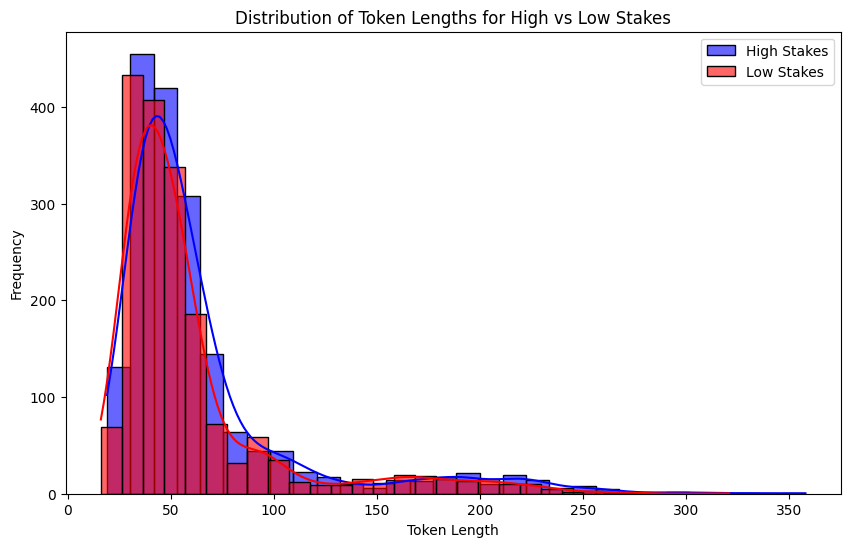

In [15]:
# Check if file exists and is not empty
import os
from pathlib import Path

file_path = Path("../data/prompts_28_02_25.jsonl")

if not file_path.exists():
    print(f"File not found: {file_path}")
else:
    # Read file contents
    with open(file_path, 'r') as f:
        contents = f.read().strip()
        
    if not contents:
        print(f"File is empty: {file_path}")
    else:
        try:
            # Try reading with pandas
            df = pd.read_json(file_path, lines=True)
            print(f"Successfully loaded {len(df)} rows")
            
            # Continue with visualization
            df['token_length'] = df['prompt'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
            
            plt.figure(figsize=(10, 6))
            sns.histplot(df[df['high_stakes'] == 1]['token_length'], bins=30, kde=True, color='blue', label='High Stakes', alpha=0.6)
            sns.histplot(df[df['high_stakes'] == 0]['token_length'], bins=30, kde=True, color='red', label='Low Stakes', alpha=0.6)

            plt.title("Distribution of Token Lengths for High vs Low Stakes")
            plt.xlabel("Token Length") 
            plt.ylabel("Frequency")
            plt.legend()
            plt.show()
            

        except ValueError as e:
            print(f"Error reading JSON: {e}")
            print("First few lines of file contents:")
            print(contents[:500])
